# **Project 3 Report**

Michael DesRoches

CS458

## **P3-1. Revisit Text Documents Classification**

**Use the 20 newsgroups dataset embedded in scikit-learn:**

In [1]:
from sklearn.datasets import fetch_20newsgroups

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import (datasets, tree, model_selection, metrics)

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space'].**

In [2]:
categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')

d_train = fetch_20newsgroups(subset = 'train',categories = categories, remove = remove)
d_test  = fetch_20newsgroups(subset = 'test',categories = categories, remove = remove)

y_train = d_train.target
y_test = d_test.target

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
x_train = vectorizer.fit_transform(d_train.data)
x_test  = vectorizer.fit_transform(d_test.data)

**(b) Build classifiers using the following methods:**
- Support Vector Machine (sklearn.svm.LinearSVC)
- Naive Bayes classifiers (sklearn.naive_bayes.MultinomialNB)
- K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier)
- Random forest (sklearn.ensemble.RandomForestClassifier)
- AdaBoost classifier (sklearn.ensemble.AdaBoostClassifier)

**Optimize the hyperparameters of these methods and compare the results of these methods.**

In [3]:
#support vector machine
sv_clf = LinearSVC(random_state = 0, tol = 1e-5)
sv_clf.fit(x_train, y_train) 

#Naive Bayes classifiers
nb_clf = MultinomialNB()
nb_clf.fit(x_train, y_train)

#K-nearest neighbors
kn_clf = KNeighborsClassifier(n_neighbors = 3)
kn_clf.fit(x_train, y_train)

#Random Forest
rf_clf = RandomForestClassifier(max_depth = 2, random_state = 0)
rf_clf.fit(x_train, y_train)

#AdaBoost classifier
ab_clf = AdaBoostClassifier(n_estimators = 100, random_state = 0)
ab_clf.fit(x_train, y_train)

#print
print(model_selection.cross_val_score(sv_clf, x_test, y_test, cv = 5))
print(model_selection.cross_val_score(nb_clf, x_test, y_test, cv = 5))
print(model_selection.cross_val_score(kn_clf, x_test, y_test, cv = 5))
print(model_selection.cross_val_score(rf_clf, x_test, y_test, cv = 5))
print(model_selection.cross_val_score(ab_clf, x_test, y_test, cv = 5))

[0.86363636 0.90909091 0.88811189 0.88111888 0.86713287]
[0.8006993  0.87412587 0.84965035 0.86363636 0.82867133]
[0.27622378 0.31818182 0.31818182 0.3041958  0.32867133]
[0.62937063 0.63286713 0.6013986  0.62937063 0.65384615]
[0.63286713 0.67832168 0.69230769 0.66433566 0.65384615]


# **P3-2.  Recognizing hand-written digits**

**Use the hand-written digits dataset embedded in scikit-learn:**

**(a) Develop a multi-layer perceptron classifier to recognize images of hand-written digits. To build your classifier, you can use:**

> sklearn.neural_network.MLPClassifier

**Instructions: use sklearn.model_selection.train_test_split to split your dataset into random train and test subsets, where you set test_size=0.5.**


CLASSIFICATION REPORT 
 MLPClassifier(max_iter=300, random_state=1):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        88
           1       0.95      0.96      0.95        91
           2       0.97      0.97      0.97        86
           3       0.94      0.84      0.88        91
           4       0.97      0.91      0.94        92
           5       0.87      0.97      0.92        91
           6       0.95      0.99      0.97        91
           7       0.94      0.96      0.95        89
           8       0.86      0.88      0.87        88
           9       0.95      0.90      0.93        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899




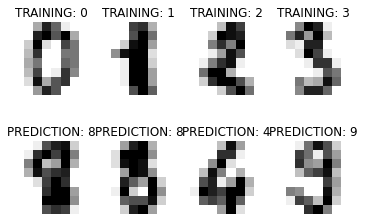

In [4]:
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits()

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('TRAINING: %i' % label)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, Y_train, Y_test = train_test_split(
    data, digits.target, test_size = 0.5, shuffle = False)

classifier = MLPClassifier(random_state = 1, max_iter = 300).fit(X_train, Y_train)

predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('PREDICTION: %i' % prediction)

print("CLASSIFICATION REPORT \n %s:\n%s\n"
      % (classifier, metrics.classification_report(Y_test, predicted)))

**(b) Optimize the hyperparameters of your neural network to maximize the classification accuracy. Show the confusion matrix of your neural network. Discuss and compare your results  with the results using a support vector classifier**

CONFUSION MATRIX:
[[85  0  0  0  1  0  2  0  0  0]
 [ 0 87  0  2  0  1  0  1  0  0]
 [ 2  0 83  1  0  0  0  0  0  0]
 [ 0  0  2 76  0  4  0  1  8  0]
 [ 3  0  0  0 84  0  1  0  0  4]
 [ 0  0  0  0  0 88  2  0  1  0]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  2  1  0 85  1  0]
 [ 0  4  1  2  0  3  0  1 77  0]
 [ 0  0  0  0  0  4  0  2  3 83]]


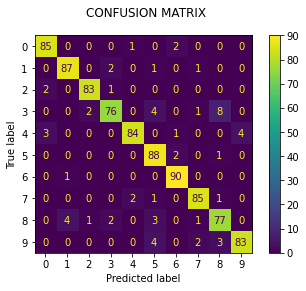

In [5]:
disp = metrics.plot_confusion_matrix(classifier, X_test, Y_test)
disp.figure_.suptitle("CONFUSION MATRIX")

print("CONFUSION MATRIX:\n%s" % disp.confusion_matrix)

plt.show()

# **P3-3. Nonlinear Support Vector Machine**

**(a) Randomly generate the following 2-class data points**
- import numpy as np
- np.random.seed(0)
- X = np.random.rand(300, 2)*10-5
- Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)


In [6]:
from sklearn import svm

np.random.seed(0)
X = np.random.rand(300,2) * 10 - 5
Y = np.logical_xor(X[:,0] > 0, X[:,1] >0)

xx, yy = np.meshgrid(np.linspace(-5, 5, 300),
                     np.linspace(-5, 5, 300))

**(b) Develop a nonlinear SVM binary classifier (sklearn.svm.NuSVC).**

In [7]:
clf = svm.NuSVC(gamma= 'auto', degree=2)
clf.fit(X,Y)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

**(c) Plot these data points and the corresponding decision boundaries, which is similar to the figure in the slide 131 in Chapter 4.**

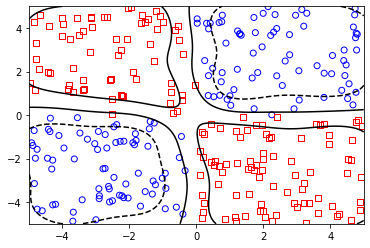

In [8]:
contours = plt.contour(xx, yy, Z, levels=3, linewidths=1.5, colors= 'k')

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], marker='o', edgecolors= 'b', facecolors='none')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], marker=',', edgecolors= 'r', facecolors='none')

plt.axis([-5, 5, -5, 5])
plt.show()